# 基本矩阵运算

In [1]:
import numpy as np

# 创建一个2x3的矩阵
matrix_2x3 = np.array([[1, 2, 3], [4, 5, 6]])
print("2x3 矩阵:")
print(matrix_2x3)
print("\n形状:", matrix_2x3.shape)

# 创建一个3x2的矩阵
matrix_3x2 = np.array([[1, 2], [3, 4], [5, 6]])
print("\n3x2 矩阵:")
print(matrix_3x2)
print("\n形状:", matrix_3x2.shape)

# 创建一个2x2的矩阵
matrix_2x2 = np.array([[1, 2], [3, 4]])
print("\n2x2 矩阵:")
print(matrix_2x2)
print("\n形状:", matrix_2x2.shape)

# 创建一个1x3的矩阵（行向量）
row_vector = np.array([1, 2, 3])
print("\n1x3 行向量:")
print(row_vector)
print("\n形状:", row_vector.shape)

# 创建一个3x1的矩阵（列向量）
column_vector = np.array([[1], [2], [3]])
print("\n3x1 列向量:")
print(column_vector)
print("\n形状:", column_vector.shape)

# 演示矩阵乘法
print("\n矩阵乘法 (2x3 * 3x2):")
print(np.dot(matrix_2x3, matrix_3x2))

# 演示矩阵转置
print("\n矩阵转置 (3x2 转置):")
print(matrix_3x2.T)

# 演示矩阵求逆 (仅适用于方阵)
if matrix_2x2.shape[0] == matrix_2x2.shape[1]:
    print("\n2x2 矩阵的逆:")
    print(np.linalg.inv(matrix_2x2))

2x3 矩阵:
[[1 2 3]
 [4 5 6]]

形状: (2, 3)

3x2 矩阵:
[[1 2]
 [3 4]
 [5 6]]

形状: (3, 2)

2x2 矩阵:
[[1 2]
 [3 4]]

形状: (2, 2)

1x3 行向量:
[1 2 3]

形状: (3,)

3x1 列向量:
[[1]
 [2]
 [3]]

形状: (3, 1)

矩阵乘法 (2x3 * 3x2):
[[22 28]
 [49 64]]

矩阵转置 (3x2 转置):
[[1 3 5]
 [2 4 6]]

2x2 矩阵的逆:
[[-2.   1. ]
 [ 1.5 -0.5]]


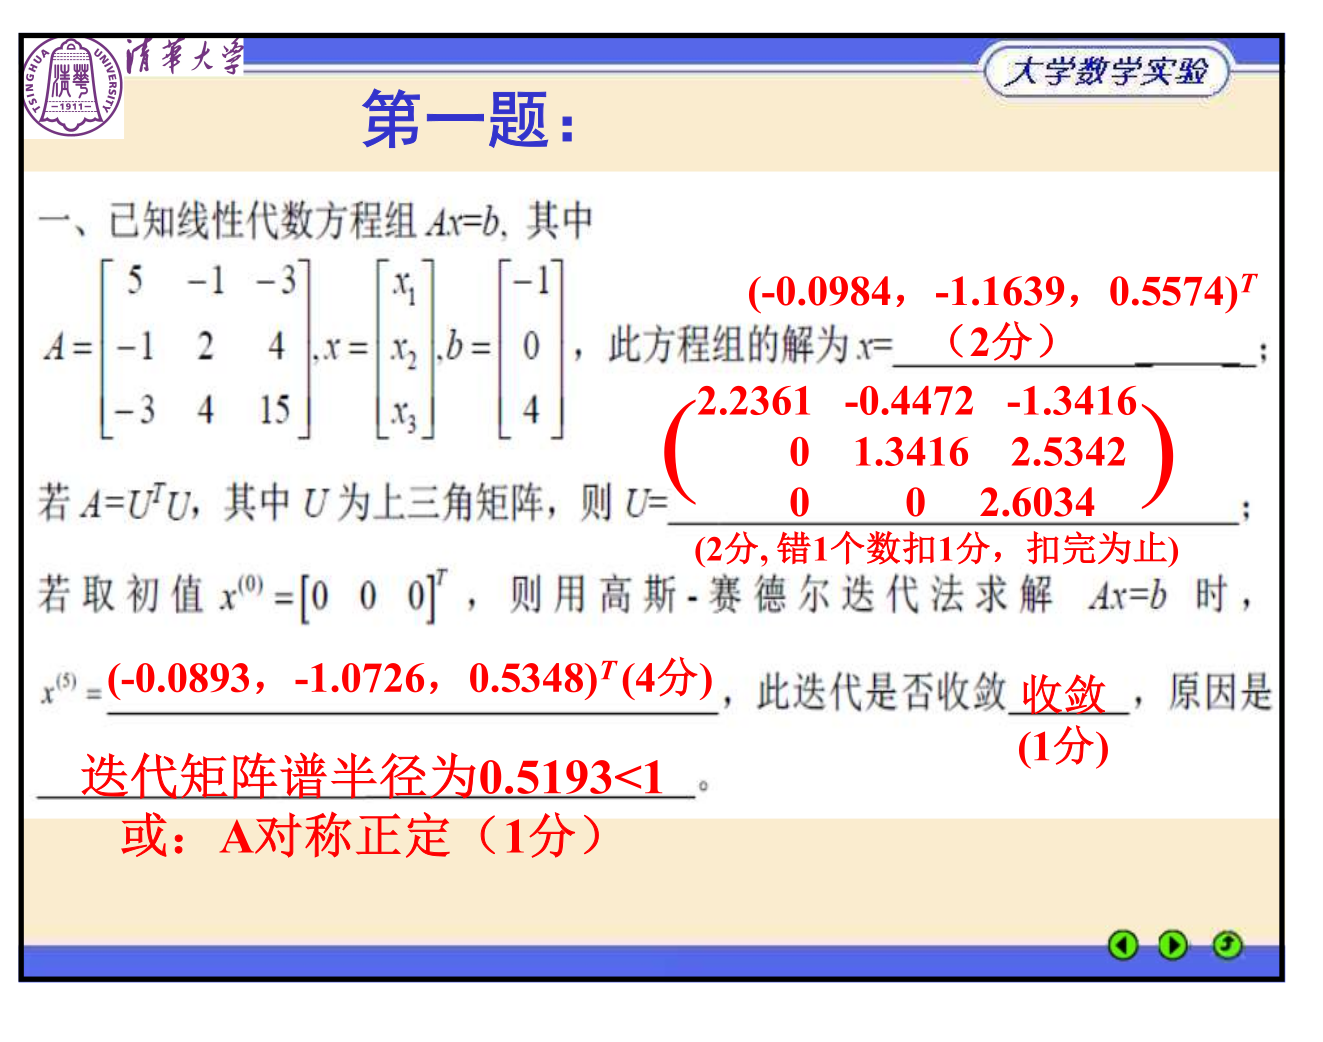

In [7]:
import numpy as np
import scipy.linalg as la
import scipy.sparse as sp

# 求解方程组 Ax=b 的解
def solve_linear_system(A, b):
    return np.linalg.solve(A, b)

A=np.array([[5,-1,-3],[-1,2,4],[-3,4,15]])
b=np.array([-1,0,4]).T
x=solve_linear_system(A,b)
print(x)

import numpy as np

if np.allclose(A, A.T):
    # 进行Cholesky分解
    L = np.linalg.cholesky(A)
    # L是下三角矩阵，其转置L.T是上三角矩阵U
    U = L.T

    # 打印结果
    print("A的Cholesky分解得到的下三角矩阵L:")
    print(L)
    print("\nA的Cholesky分解得到的上三角矩阵U:")
    print(U)
else:
    print("矩阵A不是对称矩阵，无法进行Cholesky分解。")


def gauss_seidel_iteration(A, b, x0, tol=1e-6, max_iter=10000):
    n = len(b)
    x = x0.copy()
    x_last = x0.copy()
    converged = False
    for k in range(max_iter):
        for i in range(n):
            sigma = sum(A[i, j] * x[j] for j in range(n) if j != i)
            x[i] = (b[i] - sigma) / A[i, i]
        if np.linalg.norm(x - x_last) < tol:
            converged = True
            break
        x_last = x.copy()
    return x, k + 1, converged

x,k,converged=gauss_seidel_iteration(A, b.T, np.zeros(3), tol=1e-6, max_iter=5)
print(x,k,converged)

[-0.09836066 -1.16393443  0.55737705]
A的Cholesky分解得到的下三角矩阵L:
[[ 2.23606798  0.          0.        ]
 [-0.4472136   1.34164079  0.        ]
 [-1.34164079  2.53421037  2.60341656]]

A的Cholesky分解得到的上三角矩阵U:
[[ 2.23606798 -0.4472136  -1.34164079]
 [ 0.          1.34164079  2.53421037]
 [ 0.          0.          2.60341656]]
[-0.08932719 -1.07259342  0.53482614] 5 False


last t value: 60.0
t = 60 时对应的 v 值为: 267.23861279678476
t = 60 时对应的 a 值为: 0.9294047880626746


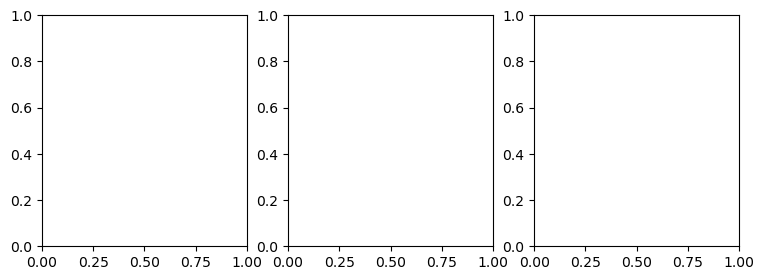

In [9]:
import numpy as np
import sympy as sp
from sympy import symbols
from scipy.integrate import solve_ivp,simpson
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# 定义符号变量
t,v = symbols("t v")


expr=((32000-0.4*v**2)/(1400-18*t))-9.8

v_prime = sp.lambdify((t, v), expr, "numpy")
t_span = (0, 60)
initial_conditions = [0]
sol = solve_ivp(
    v_prime,
    t_span,
    initial_conditions,
    method="RK45",
    t_eval=np.linspace(0, 60, 600, endpoint=True),
)
print("last t value:", sol.t[-1])
v_at_t_60 = sol.y[0][-1]
print("t = 60 时对应的 v 值为:", v_at_t_60)
a_at_t_60 = v_prime(60, v_at_t_60)
print("t = 60 时对应的 a 值为:", a_at_t_60)
# h = simpson(sol.y[0], sol.t)
# print("t = 0 到 t = 60 内 v 的积分为:", h)

fig, axs = plt.subplots(1, 3, figsize=(9, 3))


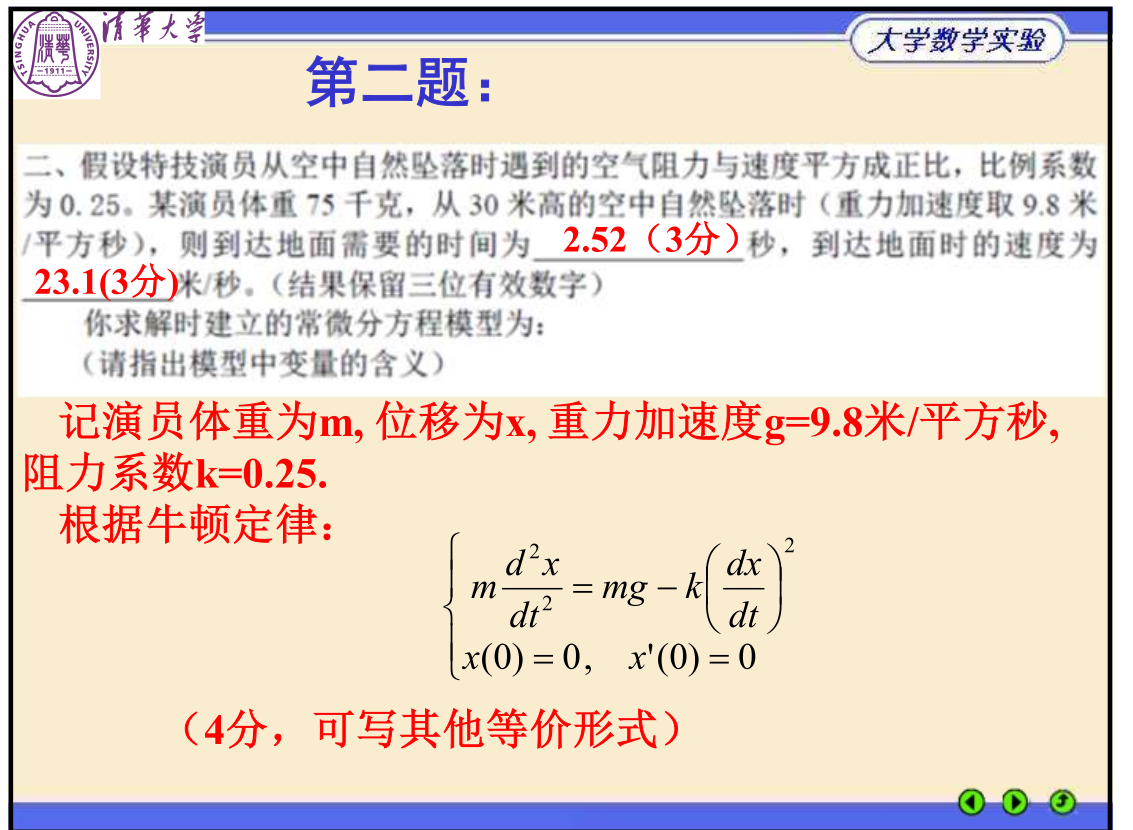

1. 常微分方程（ODE）求解：

    知识点：使用SciPy的odeint函数求解一阶常微分方程。
    步骤：
        定义常微分方程组（此处是一个简单的自由落体问题，有空气阻力）。
        指定初始条件（初始速度）。
        指定时间点数组。
        使用odeint函数求解ODE，得到速度随时间变化的解。

2. 数值积分：

    知识点：使用SciPy的cumulative_trapezoid函数进行数值积分。
    步骤：
        将ODE求解的结果（速度）转换为一维数组。
        使用cumulative_trapezoid函数计算速度随时间的累积积分，得到路程随时间变化的数组。

3. 插值和根求解：

    知识点：使用NumPy的interp函数进行插值，使用SciPy的fsolve函数求解非线性方程。
    步骤：
        定义目标路程。
        定义一个函数distance_difference，表示在给定时间点的累积路程和目标路程的差异。
        使用fsolve函数找到使得distance_difference为零的时间点，即目标路程对应的时间点。
        使用interp函数在找到的时间点插值计算对应的速度值。

In [29]:

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

m=75
g=9.8
k=0.25

# 定义常微分方程组
def model(v, t):
    dvdt = g-k/m*v*v
    return dvdt

# 初始条件
v0 = 0

# 时间点
t = np.linspace(0, 10, 5000)

# 求解ODE
solution = odeint(model, v0, t)

# print(solution)

# 绘制结果
# plt.plot(t, solution, label='v(t)')
# plt.xlabel('Time t')
# plt.ylabel('Solutions v')
# plt.legend()
# plt.show()

from scipy.integrate import simpson,cumulative_trapezoid
from scipy.optimize import fsolve

v=np.array(solution).flatten()  # 将二维数组转换为一维数组
distance=cumulative_trapezoid(v,t,initial=0) #逐步累积积分
# 给定的目标路程
target_distance = 30

# 定义一个函数表示路程和目标路程的差异
def distance_difference(t_target):
    # 在t_target对应的时间点使用插值计算路程
    return np.interp(t_target, t, distance) - target_distance

# 使用fsolve找到使得路程差为0的时间点
time_at_target_distance = fsolve(distance_difference, x0=0)

print(len(v))
print(len(t))

# 在找到的时间点插值计算对应的速度值
velocity_at_target_time = np.interp(time_at_target_distance[0], t, v)

print(f'Time at distance {target_distance}: {time_at_target_distance[0]}')
print(f'Velocity at time {time_at_target_distance[0]}: {velocity_at_target_time}')


5000
5000
Time at distance 30: 2.515796231678071
Velocity at time 2.515796231678071: 23.085308927965702


In [36]:
from scipy.optimize import root_scalar
import math

def func(x):
    return math.sqrt(1+math.cos(x))
x_0=0
for _ in range (0,10):
  x=func(x_0)
  print(x,x_0)
  x_0=x

print(math.sin(x_0))
print(math.cos(x_0))

1.4142135623730951 0
1.0751482199052251 1.4142135623730951
1.214743538878811 1.0751482199052251
1.1612826164712853 1.214743538878811
1.182439552147494 1.1612826164712853
1.1741669678971773 1.182439552147494
1.1774173304360898 1.1741669678971773
1.1761426372259431 1.1774173304360898
1.1766429035188952 1.1761426372259431
1.1764466259033448 1.1766429035188952
0.9232466096050774
0.3842078836420848


In [51]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

ALPHA=0.025
dataset={
  'x_1':[3, 4.2, 3 ,5, 6.6, 4.6, 8.4, 5],
  'x_2':[10,4.2,8,5,6,7,5,6],
  'y':[192,180 ,190 ,184, 190 ,190 ,188 ,188]
}


# x_1_times_x_2 = np.array(dataset['x_1']) * np.array(dataset['x_2'])
# x_1_times_x_3 = np.array(dataset['x_1']) * np.array(dataset['x_3'])
# x_2_times_x_3 = np.array(dataset['x_2']) * np.array(dataset['x_3'])
# x_1_squared = np.array(dataset['x_1']) * np.array(dataset['x_1'])
# x_2_squared = np.array(dataset['x_2']) * np.array(dataset['x_2'])


X=np.array([dataset['x_1'],dataset['x_2']]).T
y=np.array(dataset['y'])

# X=np.delete(X,0,axis=0)
# y=np.delete(y,0,axis=0)

def linear_regression(X, y):
  print("----------------------------------------start----------------------------------------")

  # 线性回归模型
  model = LinearRegression()
  model.fit(X, y)

  # 回归系数
  beta_0 = model.intercept_
  beta_1 = model.coef_

  print(f'回归系数 β0: {beta_0}, β1: {beta_1}')

  # 添加常数项（截距）
  X_const = sm.add_constant(X)

  # 使用statsmodels
  ols_model = sm.OLS(y, X_const).fit()
  print(ols_model.summary())

  # 置信区间
  conf = ols_model.conf_int(alpha=ALPHA)
  print(f'置信区间: \n{conf}')

  # 计算残差
  residuals = ols_model.resid
  print(f'残差: \n{residuals}')

  residuals_ci=stats.t.interval(confidence=1-ALPHA, df=len(residuals),
              loc=np.mean(residuals),
              scale=stats.sem(residuals))


  print(f'残差的置信区间: \n{residuals_ci}')

  # 计算残差的平方和
  RSS = np.sum(residuals**2)

  # 自由度
  dof = ols_model.df_resid

  # 计算剩余方差
  residual_variance = RSS / dof

  print(f'残差的平方和 (RSS): {RSS}')
  print(f'自由度 (dof): {dof}')
  print(f'剩余方差: {residual_variance}')

  residual_std = np.std(residuals)
  z_score = stats.norm.ppf(1-ALPHA / 2)  # 两侧的z值

  # 计算上下界
  lower_bound = -z_score * residual_std
  upper_bound = z_score * residual_std

  print("lower_bound",lower_bound,"upperbound",upper_bound,)

  print("----------------------------------------end----------------------------------------")
  return ols_model,beta_0,beta_1

ols_model,beta_0,beta_1=linear_regression(X,y)


----------------------------------------start----------------------------------------
回归系数 β0: 165.28341267253558, β1: [1.37815455 2.43910445]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     20.89
Date:                Sat, 22 Jun 2024   Prob (F-statistic):            0.00373
Time:                        00:43:57   Log-Likelihood:                -12.799
No. Observations:                   8   AIC:                             31.60
Df Residuals:                       5   BIC:                             31.84
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025 

/home/yux/codes/math-exam/mathematical_exp/.conda/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  res = hypotest_fun_out(*samples, **kwds)
